In [1]:
## tutorial using colon dataset for survival analysis

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [4]:
orig = pd.read_csv('../Datasets/colon.csv')
print(orig.shape)
orig.head(2)

(888, 15)


,time,status,study,rx,sex,age,obstruct,perfor,adhere,nodes,differ,extent,surg,node4,etype
0,8,1,1,3,0,32,0,0,0,14,3,2,0,1,1
1,9,1,1,3,1,55,1,0,0,5,3,3,0,1,1


In [5]:
orig.status.value_counts()

1    446
0    442
Name: status, dtype: int64

In [7]:
print(orig.time.min(), orig.time.max())

8 3329


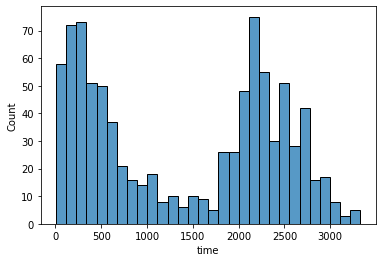

In [14]:
## time distribution
sns.histplot(orig.time, bins=30)

In [10]:
## can drop study column
orig.study.value_counts()

1    888
Name: study, dtype: int64

In [13]:
orig.rx.value_counts()

2    305
1    294
3    289
Name: rx, dtype: int64

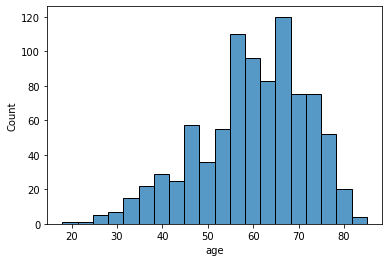

In [16]:
sns.histplot(orig.age, bins=20)

In [17]:
## status distributed relatively evenly bt sex
orig.groupby(['sex', 'status']).size()

sex  status
0    0         206
     1         222
1    0         236
     1         224
dtype: int64

In [27]:
orig.etype.value_counts()

1    888
Name: etype, dtype: int64

In [18]:
orig.columns

Index(['time', 'status', 'study', 'rx', 'sex', 'age', 'obstruct', 'perfor',
       'adhere', 'nodes', 'differ', 'extent', 'surg', 'node4', 'etype'],
      dtype='object')

In [29]:
df = orig.copy()

df = df[['time', 'sex', 'age', 'status']]

In [33]:
df.describe()

,time,sex,age,status
count,888.000000,888.000000,888.000000,888.000000
mean,1410.355856,0.518018,59.810811,0.502252
std,998.002952,0.499957,11.914493,0.500277
min,8.000000,0.000000,18.000000,0.000000
25%,379.750000,0.000000,53.000000,0.000000
50%,1556.000000,1.000000,61.000000,1.000000
75%,2289.750000,1.000000,69.000000,1.000000
max,3329.000000,1.000000,85.000000,1.000000


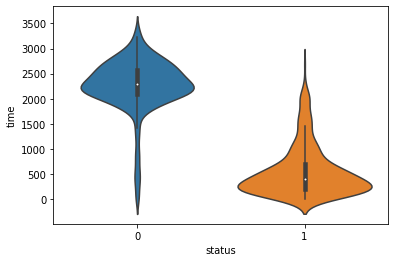

In [34]:
sns.violinplot(data=df, x='status', y='time')

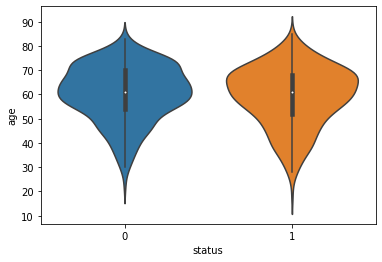

In [35]:
sns.violinplot(data=df, x='status', y='age')

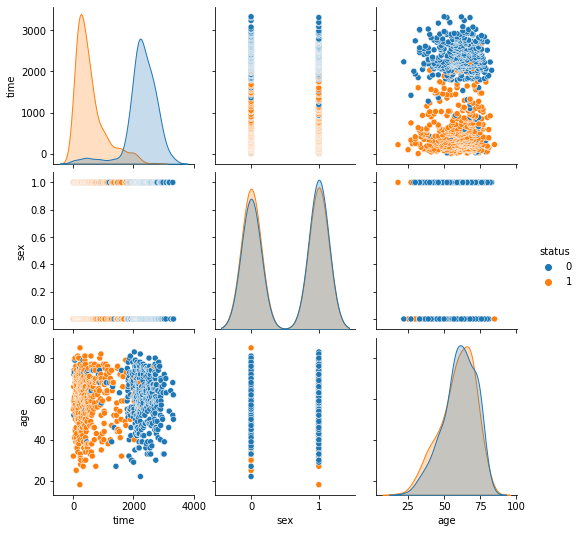

In [30]:
sns.pairplot(df, hue='status')

#### Survival Analysis - Kaplan Meier Fitter

In [37]:
df.head(2)

,time,sex,age,status
0,8,0,32,1
1,9,1,55,1


In [40]:
## status 0 being associated with higher time mean is odd ...
## reverse the boolean label of the status column
df.status = df.status.map({0: 1, 1:0})

df.head(2)

,time,sex,age,status
0,8,0,32,1
1,9,1,55,1


In [41]:
kmf = KaplanMeierFitter()

C:\Users\liamk\Anaconda3\lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)


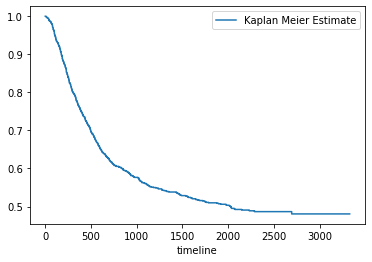

In [42]:
kmf.fit(df.time, df.status, label='Kaplan Meier Estimate')
kmf.plot(ci_show=False)

In [48]:
## KME change per increment of timeline of 100
kmf.survival_function_[kmf.survival_function_.index % 100 == 0]

,Kaplan Meier Estimate
timeline,
0.0,1.000000
100.0,0.954789
300.0,0.800851
700.0,0.623904
900.0,0.590477
1800.0,0.509689
2100.0,0.492278
2200.0,0.490705
2300.0,0.486561


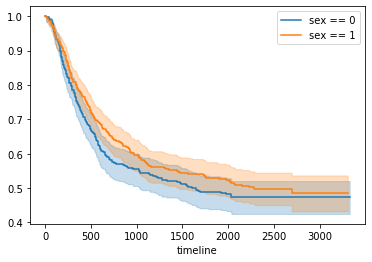

In [53]:
T = df.time
E = df.status
groups = df.sex
i0 = (groups == 0)
i1 = (groups == 1)

kmf1 = KaplanMeierFitter()
kmf1.fit(T[i0], E[i0], label='sex == 0')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i1], E[i1], label='sex == 1')
kmf1.plot(ax=a1)

#### Survival Analysis - Cox Proportional Hazard Model

In [99]:
dcat = orig.copy()
dcat.head(2)

,time,status,study,rx,sex,age,obstruct,perfor,adhere,nodes,differ,extent,surg,node4,etype
0,8,1,1,3,0,32,0,0,0,14,3,2,0,1,1
1,9,1,1,3,1,55,1,0,0,5,3,3,0,1,1


In [100]:
dcat.status = dcat.status.map({0: 1, 1:0})
dcat.status.value_counts()

0    446
1    442
Name: status, dtype: int64

In [101]:
dcat.drop(columns=['study', 'etype'], inplace=True)
dcat.head(2)

,time,status,rx,sex,age,obstruct,perfor,adhere,nodes,differ,extent,surg,node4
0,8,0,3,0,32,0,0,0,14,3,2,0,1
1,9,0,3,1,55,1,0,0,5,3,3,0,1


In [107]:
cph = CoxPHFitter()

cph.fit(dcat, 'time', event_col='status')
cph.print_summary() 

<lifelines.CoxPHFitter: fitted with 888 total observations, 446 right-censored observations>
             duration col = 'time'
                event col = 'status'
   number of observations = 888
number of events observed = 442
   partial log-likelihood = -2260.46
         time fit was run = 2022-05-17 02:15:07 UTC

---
           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
rx        -0.01       0.99       0.06            -0.12             0.10                 0.88                 1.10
sex        0.14       1.15       0.10            -0.05             0.33                 0.95                 1.39
age        0.01       1.01       0.00             0.00             0.02                 1.00                 1.02
obstruct   0.18       1.19       0.13            -0.08             0.43                 0.92                 1.54
perfor     0.11       1.12       0.33            -0.54             0.76                 0.58               

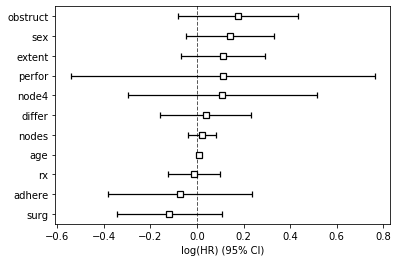

In [108]:
cph.plot()

In [114]:
sample_set = dcat.iloc[110:115, 2:]

sample_set

,rx,sex,age,obstruct,perfor,adhere,nodes,differ,extent,surg,node4
110,2,1,67,0,1,0,4,2,4,0,0
111,2,1,57,0,0,0,4,1,3,0,0
112,1,0,60,0,0,1,10,2,3,1,1
113,3,0,45,0,0,0,3,2,3,0,0
114,2,0,59,0,0,0,4,2,3,1,0


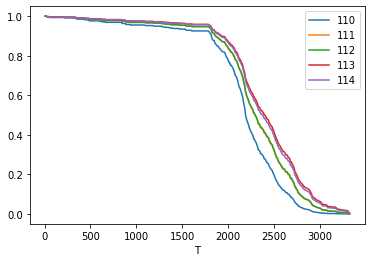

In [115]:
cph.predict_survival_function(sample_set).plot()